To-do:
- Make sure all libraries in for 3D -> 1D pharmacophore graph
- As in matrix calculations
- Network X

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolAlign
from rdkit.Chem.Draw import MolsToGridImage
from pharmacophore import Pharmacophore, Draw, View


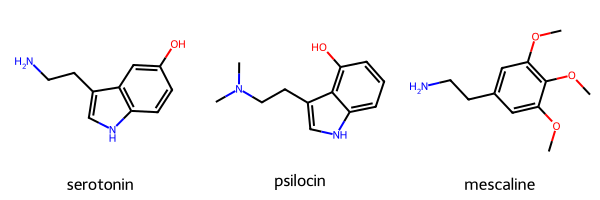

In [2]:
molecules = {"serotonin": "C1=CC2=C(C=C1O)C(=CN2)CCN",
             "psilocin": "CN(C)CCc1c[nH]c2cccc(O)c12",
             "mescaline": "O(c1cc(cc(OC)c1OC)CCN)C"}

mol_smi = [smi for smi in molecules.values()]
mol_name = [name for name in molecules.keys()]
mols = [Chem.MolFromSmiles(smi) for smi in mol_smi]

MolsToGridImage(mols=mols, legends=mol_name)

In [5]:
mols = [Chem.AddHs(mol) for mol in mols]
ps = AllChem.ETKDGv3()
ps.randomSeed = 42
for mol in mols:
    AllChem.EmbedMolecule(mol, ps)

In [6]:
aligned = []

for mol in mols:
    mol_aligned = rdMolAlign.GetO3A(mol, mols[0])
    aligned.append(mol_aligned.Align())

In [11]:
for mol, name in zip(mols, mol_name):
    w = Chem.SDWriter(f"data/{name}.sdf")
    w.write(mol)
    w.close()

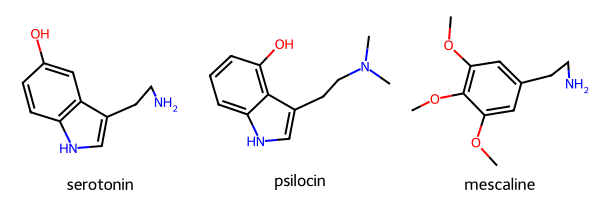

In [13]:
mols_noH = [Chem.RemoveHs(mol) for mol in mols]
MolsToGridImage(mols=mols_noH, legends=mol_name)

In [ ]:
pharm = Pharmacophore(features="default")

# cab test this also -- presence/absence of pharmacophore features
df = pharm.to_df(mols_noH, mol_name=mol_name)
df

,serotonin,psilocin,mescaline
Donor,3,2,1
Aromatic,2,2,1
Acceptor,0,1,3
Hydrophobe,0,3,3
